# Project 4 - Wrangle and Analyse Data

TODO: add description about the project

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import tweepy

%matplotlib inline

# Configures pandas to do not truncate the columns
pd.set_option('display.max_colwidth', None)

---
## Gather

Frist, let's read the file that was given.

### Read File with Twitter Information

In [2]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### Download Image Preditions File

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', 'w') as file:
    file.write(response.text)

In [3]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Download Additional Twitter Data from API

In [5]:
# Remove this keys before submiting
consumer_key = ''
consumer_secret = ''

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

# Configures the library to wait when a rate limit error occurs
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
with open('tweet_json.txt', 'w') as file:
    for tweet_id in twitter_archive_enhanced.tweet_id:
        try:
            result = api.get_status(tweet_id, tweet_mode='extended')
            file.write(json.dumps(result._json) + '\n')
        except Exception as e:
            print(f'Error while getting json data from tweet {tweet_id} with error: {e}')

Error while getting json data from tweet 888202515573088257 with error: [{'code': 144, 'message': 'No status found with that ID.'}]
Error while getting json data from tweet 873697596434513921 with error: [{'code': 144, 'message': 'No status found with that ID.'}]
Error while getting json data from tweet 872668790621863937 with error: [{'code': 144, 'message': 'No status found with that ID.'}]
Error while getting json data from tweet 872261713294495745 with error: [{'code': 144, 'message': 'No status found with that ID.'}]
Error while getting json data from tweet 869988702071779329 with error: [{'code': 144, 'message': 'No status found with that ID.'}]
Error while getting json data from tweet 866816280283807744 with error: [{'code': 144, 'message': 'No status found with that ID.'}]
Error while getting json data from tweet 861769973181624320 with error: [{'code': 144, 'message': 'No status found with that ID.'}]
Error while getting json data from tweet 856602993587888130 with error: [{'c

Rate limit reached. Sleeping for: 105


Error while getting json data from tweet 754011816964026368 with error: [{'code': 144, 'message': 'No status found with that ID.'}]
Error while getting json data from tweet 680055455951884288 with error: [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 216


In [4]:
statuses = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        statuses.append(json.loads(line))

In [5]:
tweet_json = pd.json_normalize(statuses)
tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,place.id,place.url,place.place_type,place.name,place.full_name,place.country_code,place.country,place.contained_within,place.bounding_box.type,place.bounding_box.coordinates
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,False,"[0, 79]","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",False,"[0, 138]","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
## Assess

In [6]:
twitter_archive_enhanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1044,743609206067040256,NaN,NaN,2016-06-17 01:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Stark. He just had his first ice cream cone. Got some on his nose. Requests your assistance. 10/10 would assist https://t.co/YwfN1lbpKA,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/743609206067040256/photo/1,https://twitter.com/dog_rates/status/743609206067040256/photo/1,https://twitter.com/dog_rates/status/743609206067040256/photo/1",10,10,Stark,None,None,None,None
1185,718613305783398402,NaN,NaN,2016-04-09 01:35:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Carper. He's a Tortellini Angiosperm. In desperate need of a petting. 11/10 would hug softly https://t.co/lK9YDkRzPj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718613305783398402/photo/1,11,10,Carper,None,None,None,None
1529,690248561355657216,NaN,NaN,2016-01-21 19:04:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Maxwell. That's his moped. He rents it out for others to use as long as he can come also. 11/10 great dog https://t.co/IF5kKaO945,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690248561355657216/photo/1,11,10,Maxwell,None,None,None,None
488,813944609378369540,NaN,NaN,2016-12-28 03:08:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Bruce. He never backs down from a challenge. 11/10 you got this Bruce https://t.co/aI7umZHIq7,7.902771e+17,4.196984e+09,2016-10-23 19:42:02 +0000,"https://twitter.com/dog_rates/status/790277117346975746/photo/1,https://twitter.com/dog_rates/status/790277117346975746/photo/1",11,10,Bruce,None,None,None,None
1564,688116655151435777,NaN,NaN,2016-01-15 21:52:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please send dogs. I'm tired of seeing other stuff like this dangerous pirate. We only rate dogs. Thank you... 10/10 https://t.co/YdLytdZOqv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688116655151435777/photo/1,10,10,None,None,None,None,None


In [7]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

`name`, `doggo`, `floofer`, `pupper` and `puppo` columns have a invalid null value (the python string **None**). 

`doggo`, `floofer`, `pupper` and `puppo` are classifications of a dog and should be in one column.

`timestamp` is not in datetime format.

We have 78 replies (indicated by `in_reply_to_status_id`) in the database. This is not a problem.

We have 59 entries without images (indicated by `expanded_urls`) who need to be removed.

In [8]:
twitter_archive_enhanced.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

We can see that `source` has two information in one column, the link of the source and the text of the source. Because we do not need the link of the source, we can extract the text and put it in the source.

In [9]:
twitter_archive_enhanced[~twitter_archive_enhanced.retweeted_status_id.isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Shaggy. He knows exactly how to solve the puzzle but can't talk. All he wants to do is help. 10/10 great guy https:/…,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724293877760/photo/1,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0Dv…,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269671505920/photo/1,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @twitter: @dog_rates Awesome Tweet! 12/10. Would Retweet. #LoveT

181 retweets was not correctly removed. So we need to remove it.

In [10]:
twitter_archive_enhanced[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [11]:
twitter_archive_enhanced[twitter_archive_enhanced.rating_numerator < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111729840128/photo/1,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313023332352/photo/1,7,10,Herschel,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [12]:
twitter_archive_enhanced[twitter_archive_enhanced.rating_numerator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None


In [13]:
twitter_archive_enhanced[twitter_archive_enhanced.rating_numerator > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None


There are some decimal value in the numerator and it was not parsed correctly to `rating_numerator`.

There are some records who have 24/7 incorrectly converted as a rating.

In [14]:
twitter_archive_enhanced[twitter_archive_enhanced.rating_denominator < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None


In [15]:
twitter_archive_enhanced[twitter_archive_enhanced.rating_denominator > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a hr

If a record have more than one fraction, the last one is usually the rating. The code used to parse this ratings consider the first fraction as being the rating.

Some numerator and denominator are really huge, but when they are divided, the rating is acceptable.

In [16]:
twitter_archive_enhanced[twitter_archive_enhanced.text.str.contains('\d+/\d+/\d+')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None


The record with tweet_id 832088576586297345 is not a rating record, instead it's a date.

In [17]:
twitter_archive_enhanced[twitter_archive_enhanced.name != 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None


In [18]:
list(twitter_archive_enhanced.name.value_counts().index)

['None',
 'a',
 'Charlie',
 'Oliver',
 'Cooper',
 'Lucy',
 'Lola',
 'Tucker',
 'Penny',
 'Bo',
 'Winston',
 'Sadie',
 'the',
 'Toby',
 'an',
 'Buddy',
 'Bailey',
 'Daisy',
 'Bella',
 'Jax',
 'Jack',
 'Stanley',
 'Oscar',
 'Koda',
 'Leo',
 'Rusty',
 'Scout',
 'Dave',
 'Milo',
 'Alfie',
 'George',
 'Sammy',
 'Phil',
 'Chester',
 'Bentley',
 'Finn',
 'very',
 'Oakley',
 'Gus',
 'Sunny',
 'Louis',
 'Larry',
 'Dexter',
 'Ruby',
 'Cassie',
 'Shadow',
 'Sampson',
 'Carl',
 'Luna',
 'Sophie',
 'Duke',
 'Bear',
 'Jerry',
 'Gerald',
 'Jeffrey',
 'Scooter',
 'Clark',
 'Beau',
 'Reginald',
 'Winnie',
 'Brody',
 'Riley',
 'Chip',
 'Loki',
 'one',
 'Boomer',
 'Maximus',
 'Walter',
 'Maggie',
 'quite',
 'Clarence',
 'Maddie',
 'just',
 'Hank',
 'Archie',
 'Reggie',
 'Bruce',
 'Moose',
 'Derek',
 'Gary',
 'Doug',
 'Lily',
 'Louie',
 'Ted',
 'Nala',
 'Zoey',
 'Rory',
 'Rosie',
 'Samson',
 'Max',
 'Frankie',
 'Wyatt',
 'Steven',
 'Olive',
 'Earl',
 'Mia',
 'Kyle',
 'Ellie',
 'Jimothy',
 'Waffles',
 'Vin

There are some invalid `name` that starts with lowercase letter (like `one`, `an`, `not`, `a`, etc.)

In [19]:
twitter_archive_enhanced[twitter_archive_enhanced.text.str.contains('doggo')].query('doggo == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
83,876537666061221889,NaN,NaN,2017-06-18 20:30:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu,NaN,NaN,NaN,https://twitter.com/mpstowerham/status/876162994446753793,14,10,None,None,None,None,None
268,841439858740625411,NaN,NaN,2017-03-14 00:04:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have some incredible doggos for #K9VeteransDay. All brave as h*ck. Salute your dog in solidarity. 14/10 for all https://t.co/SVNMdFqKDL,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1",14,10,None,None,None,None,None
302,836648853927522308,NaN,NaN,2017-02-28 18:46:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @SchafeBacon2016: @dog_rates Slightly disturbed by the outright profanity, but confident doggos were involved. 11/10, would tailgate aga…",8.366481e+17,7.124572e+17,2017-02-28 18:43:57 +0000,https://twitter.com/SchafeBacon2016/status/836648149003485187/photo/1,11,10,None,None,None,None,None
475,816062466425819140,NaN,NaN,2017-01-02 23:23:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\nhttps://…,8.159907e+17,4.196984e+09,2017-01-02 18:38:42 +0000,"https://www.gofundme.com/surgeryforjacktheminpin,https://twitter.com/dog_rates/status/815990720817401858/photo/1",11,10,Jack,None,None,None,None
477,815990720817401858,NaN,NaN,2017-01-02 18:38:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\nhttps://t.co/r4W111FzAq https://t.co/fQpYuMKG3p,NaN,NaN,NaN,"https://www.gofundme.com/surgeryforjacktheminpin,https://twitter.com/dog_rates/status/815990720817401858/photo/1",11,10,Jack,None,None,None,None
798,772877495989305348,NaN,NaN,2016-09-05 19:22:09 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",You need to watch these two doggos argue through a cat door. Both 11/10 https://t.co/qEP31epKEV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772877495989305348/video/1,11,10,None,None,None,None,None
934,753420520834629632,NaN,NaN,2016-07-14 02:47:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we are witnessing an isolated squad of bouncing doggos. Unbelievably rare for this time of year. 11/10 for all https://t.co/CCdlwiTwQf,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753420520834629632/video/1,11,10,None,None,None,None,None
946,752568224206688256,NaN,NaN,2016-07-11 18:20:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Here are three doggos completely misjudging an airborne stick. Decent efforts tho. All 9/10 https://t.co/HCXQL4fGVZ,NaN,NaN,NaN,https://vine.co/v/5W0bdhEUUVT,9,10,None,None,None,None,None
987,749036806121881602,NaN,NaN,2016-07-02 00:27:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dietrich. He hops at random. Other doggos don't understand him. It upsets him greatly. 8/10 would comfort https://t.co/U8cSRz8wzC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749036806121881602/p

In [20]:
twitter_archive_enhanced[twitter_archive_enhanced.text.str.contains('floofer')].query('floofer == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [21]:
twitter_archive_enhanced[twitter_archive_enhanced.text.str.contains('pupper')].query('pupper == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
54,881666595344535552,NaN,NaN,2017-07-03 00:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881666595344535552/photo/1,13,10,Gary,None,None,None,None
993,748575535303884801,NaN,NaN,2016-06-30 17:54:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 https://t.co/z5bAdtn9kd,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748575535303884801/photo/1,6,10,one,None,None,None,None
1027,746056683365994496,NaN,NaN,2016-06-23 19:05:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Arlen and Thumpelina. They are best pals. Cuddly af. 11/10 for both puppers https://t.co/VJgbgIzIHx,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746056683365994496/photo/1,https://twitter.com/dog_rates/status/746056683365994496/photo/1",11,10,Arlen,None,None,None,None
1093,737310737551491075,NaN,NaN,2016-05-30 15:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Everybody stop what you're doing and watch these puppers enjoy summer. Both 13/10 https://t.co/wvjqSCN6iC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737310737551491075/video/1,13,10,None,None,None,None,None
1220,714606013974974464,NaN,NaN,2016-03-29 00:12:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here are two lil cuddly puppers. Both 12/10 would snug like so much https://t.co/zO4eb7C4tG,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714606013974974464/photo/1,12,10,None,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,None,None,None,None
1265,709901256215666688,NaN,NaN,2016-03-16 00:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","WeRateDogs stickers are here and they're 12/10! Use code ""puppers"" at checkout 🐶🐾\n\nShop now: https://t.co/k5xsufRKYm https://t.co/ShXk46V13r",NaN,NaN,NaN,"http://goo.gl/ArWZfi,https://twitter.com/dog_rates/status/709901256215666688/photo/1,https://twitter.com/dog_rates/status/709901256215666688/photo/1,https://twitter.com/dog_rates/status/709901256215666688/photo/1,https://twitter.com/dog_rates/status/709901256215666688/photo/1",12,10,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60,50,a,None,None,None,None
1516,690959652130045952,NaN,NaN,2016-01-23 18:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This golden is happy to refute the soft mouth 

In [22]:
twitter_archive_enhanced[twitter_archive_enhanced.text.str.contains('puppo')].query('puppo == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
85,876120275196170240,NaN,NaN,2017-06-17 16:52:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Venti, a seemingly caffeinated puppoccino. She was just informed the weekend would include walks, pats and scritches. 13/10 much excite https://t.co/ejExJFq3ek",NaN,NaN,NaN,https://twitter.com/dog_rates/status/876120275196170240/photo/1,13,10,Venti,None,None,None,None
106,871879754684805121,NaN,NaN,2017-06-06 00:01:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Lassie. She's celebrating #PrideMonth by being a splendid mix of astute and adorable. Proudly supupporting her owner. 13/10 https://t.co/uK6PNyeh9w,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/871879754684805121/photo/1,https://twitter.com/dog_rates/status/871879754684805121/photo/1",13,10,Lassie,None,None,None,None
134,866686824827068416,NaN,NaN,2017-05-22 16:06:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lili. She can't believe you betrayed her with bath time. Never looking you in the eye again. 12/10 would puppologize profusely https://t.co/9b9J46E86Z,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/866686824827068416/photo/1,https://twitter.com/dog_rates/status/866686824827068416/photo/1",12,10,Lili,None,None,None,None
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525470990336/photo/1,13,10,None,doggo,None,None,None
228,848213670039564288,8.482121e+17,4.196984e+09,2017-04-01 16:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Jerry just apuppologized to me. He said there was no ill-intent to the slippage. I overreacted I admit. Pupgraded to an 11/10 would pet,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
274,840698636975636481,8.406983e+17,8.405479e+17,2017-03-11 22:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@0_kelvin_0 &gt;10/10 is reserved for puppos sorry Kevin,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
296,837366284874571778,NaN,NaN,2017-03-02 18:17:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lucy. She has a portrait of herself on her ear. Excellent for identification pupposes. 13/10 innovative af https://t.co/uNmxbL2lns,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837366284874571778/photo/1,13,10,Lucy,None,None,None,None
545,805826884734976000,NaN,NaN,2016-12-05 17:31:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Duke. He is not a fan of the pupporazzi. 12/10 https://t.co/SgpBVYIL18,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805826884734976000/video/1,12,10,Duke,None,None,None,None


Some variations of the classification in the stages of the dogs (like plural) was not correctly parsed.

In [23]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
585,678991772295516161,https://pbs.twimg.com/media/CWxDaXHWsAAWV8W.jpg,1,Eskimo_dog,0.330216,True,Siberian_husky,0.187003,True,Chihuahua,0.101420,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
1281,750147208377409536,https://pbs.twimg.com/media/CmkO57iXgAEOxX9.jpg,1,pug,0.977765,True,Boston_bull,0.004794,True,French_bulldog,0.004573,True
1030,711306686208872448,https://pbs.twimg.com/media/Cd8Rpl0W0AAN1kU.jpg,1,leatherback_turtle,0.280835,False,loggerhead,0.123290,False,Dandie_Dinmont,0.086792,True
1317,755206590534418437,https://pbs.twimg.com/media/CnsIT0WWcAAul8V.jpg,1,web_site,0.906673,False,printer,0.008600,False,carton,0.004533,False


In [24]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


There are some missing records in the `image_predictions` table. We can not do anything in this case because we do not access to the model used to evaluate the images.

In [25]:
tweet_json.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,place.id,place.url,place.place_type,place.name,place.full_name,place.country_code,place.country,place.contained_within,place.bounding_box.type,place.bounding_box.coordinates
955,Mon Jul 04 15:00:45 +0000 2016,749981277374128128,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,False,"[0, 54]","<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Mon Jul 17 16:17:36 +0000 2017,886983233522544640,886983233522544640,This is Maya. She's very shy. Rarely leaves her cup. 13/10 would find her an environment to thrive in https://t.co/I6oNy0CgiT,False,"[0, 101]","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
475,Tue Dec 27 17:36:16 +0000 2016,813800681631023104,813800681631023104,This is Sky. She's learning how to roll her R's. 12/10 cultured af https://t.co/OuaVvVkwJ1,False,"[0, 66]","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,Tue Feb 14 01:09:44 +0000 2017,831309418084069378,831309418084069378,This is Scooter and his son Montoya. Scooter is a wonderful father. He takes very good care of Montoya. Both 12/10 would pet at same time https://t.co/ghqMfxxa4V,False,"[0, 138]","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1294,Sun Mar 06 17:52:42 +0000 2016,706538006853918722,706538006853918722,"This is Oliver (pronounced ""Ricardo""). He's a ship captain. Controls these treacherous waters. 11/10 would sail with https://t.co/bxjO45rXKd",False,"[0, 140]","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Columns: 322 entries, created_at to place.bounding_box.coordinates
dtypes: bool(15), float64(74), int64(9), object(224)
memory usage: 5.5+ MB


In [27]:
list(tweet_json)

['created_at',
 'id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'entities.hashtags',
 'entities.symbols',
 'entities.user_mentions',
 'entities.urls',
 'entities.media',
 'extended_entities.media',
 'user.id',
 'user.id_str',
 'user.name',
 'user.screen_name',
 'user.location',
 'user.description',
 'user.url',
 'user.entities.url.urls',
 'user.entities.description.urls',
 'user.protected',
 'user.followers_count',
 'user.friends_count',
 'user.listed_count',
 'user.created_at',
 'user.favourites_count',
 'user.utc_offset',
 'user.time_zone',
 'user.geo_enabled',
 'user.verified',
 'user.statuses_count',
 'user.lang',
 'us

In [28]:
tweet_json.shape

(2331, 322)

In [29]:
twitter_archive_enhanced.shape

(2356, 17)

As saw when was downloading the data from Twitter api, 25 tweets were deleted or were changed to be private.

`retweet_count` and `favorite_count` should be in the `twitter_archive_enhanced` table.

#### Quality
- Nulls represented as '**None**' in `name`, `doggo`, `floofer`, `pupper` and `puppo` columns.
- Erroneous datatype (`timestamp`).
- There are 181 retweets.
- There are 59 tweets without image.
- There are tweets with 24/7 wrongly interpreted as a rating.
- Record with tweet_id 832088576586297345 is not a rating tweet.
- There are some ratings who have decimal and was not correctly extracted to `rating_numerator`.
- There are tweets with more than one fraction.
- There are some invalid `name` that starts with lowercase letter.
- Some variations of the classification in stages of the dogs was not correctly parsed.
- There are some missing predictions in the `image_predictions` table (can not fix).
- We can not get the additional data from 25 tweets because they were deleted or were changed to be private (can not fix).
- We only need the text source in the `source` column.

#### Tidiness
- Two information inside `source` column.
- `retweet_count` and `favorite_count` should be in the `twitter_archive_enhanced` table.
- Classification of a dog in four columns (`doggo`, `floofer`, `pupper` and `puppo`).

## Clean

In [30]:
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()

### Nulls represented as '**None**' in `name`, `doggo`, `floofer`, `pupper` and `puppo` columns.

#### Define
- Replace 'None' by np.NaN in each column

#### Code

In [31]:
def replace_none_by_nan(field_name):
    twitter_archive_enhanced_clean[field_name].replace('None', np.NaN, inplace=True)

replace_none_by_nan('name')
replace_none_by_nan('doggo')
replace_none_by_nan('floofer')
replace_none_by_nan('pupper')
replace_none_by_nan('puppo')

#### Test

In [32]:
assert sum(twitter_archive_enhanced_clean.name == 'None') == 0
assert sum(twitter_archive_enhanced_clean.doggo == 'None') == 0
assert sum(twitter_archive_enhanced_clean.floofer == 'None') == 0
assert sum(twitter_archive_enhanced_clean.pupper == 'None') == 0
assert sum(twitter_archive_enhanced_clean.puppo == 'None') == 0
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

### Erroneous datatype (`timestamp`).
#### Define
- Convert `timestamp` to datetime field.

#### Code

In [33]:
twitter_archive_enhanced_clean.timestamp = pd.to_datetime(twitter_archive_enhanced_clean.timestamp)

#### Test

In [34]:
assert twitter_archive_enhanced_clean.timestamp.dtype == 'datetime64[ns, UTC]'

### There are 181 retweets.
#### Define
- Remove the tweets which `retweeted_status_id` is not null
- Drop the columns `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`

#### Code

In [35]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_id.isnull()]

In [36]:
twitter_archive_enhanced_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

#### Test

In [37]:
assert twitter_archive_enhanced_clean.text.str.startswith('RT @').sum() == 0
assert ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'] not in list(twitter_archive_enhanced_clean)

### There are 59 tweets without image.
#### Define
- Remove the tweets which `expanded_urls` is null

#### Code

In [38]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~twitter_archive_enhanced_clean.expanded_urls.isna()]

#### Test

In [39]:
assert twitter_archive_enhanced_clean.expanded_urls.isna().sum() == 0

### 24/7 wrongly interpreted as a rating.
#### Define
- Remove all records with 24/7

#### Code

In [40]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~twitter_archive_enhanced_clean.text.str.contains('24/7')]

#### Test

In [41]:
assert twitter_archive_enhanced_clean.text.str.contains('24/7').sum() == 0

### Record with tweet_id 832088576586297345 is not a rating tweet.
#### Define
- Remove record with tweet_id 832088576586297345

#### Code

In [42]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~(twitter_archive_enhanced_clean.tweet_id == 832088576586297345)]

#### Test

In [43]:
assert sum(twitter_archive_enhanced_clean.tweet_id == 832088576586297345) == 0

### There are some `rating_numerator` who have a decimal AND There are tweets with more than one fraction
#### Define
- Reextract the numerator and denominator using a regular expression, considering more than on fraction and with decimal value

#### Code

In [44]:
numerator_and_denominator = twitter_archive_enhanced_clean.text.str.findall('(\d+(?:\.\d+)?)\/(\d+(?:\.\d+)?)').map(lambda x: x[-1])
parsed_df = pd.DataFrame([[numerator, denominator] for numerator, denominator in numerator_and_denominator])
twitter_archive_enhanced_clean[['rating_numerator', 'rating_denominator']] = parsed_df.values

In [45]:
# Convert both column to float
twitter_archive_enhanced_clean.rating_numerator = twitter_archive_enhanced_clean.rating_numerator.astype(float)
twitter_archive_enhanced_clean.rating_denominator = twitter_archive_enhanced_clean.rating_denominator.astype(float)

#### Test

In [46]:
assert (twitter_archive_enhanced_clean.rating_numerator.apply(lambda x: x % 1) > 0).sum() > 0
assert twitter_archive_enhanced_clean.rating_numerator.isna().sum() == 0
assert twitter_archive_enhanced_clean.rating_denominator.isna().sum() == 0

### There are some invalid `name` that starts with lowercase letter
#### Define
- Set every name that starts with a lowercase letter to null

#### Code

In [47]:
twitter_archive_enhanced_clean.name.replace('^[a-z]', np.NaN, inplace=True, regex=True)

#### Test

In [48]:
assert twitter_archive_enhanced_clean.name.str.contains('^[a-z]').sum() == 0

### Some variations of the classification in the stages of the dogs (like plural) was not correctly parsed.
#### Define
- Reextract the classification allowing variations of the name

#### Code

In [49]:
twitter_archive_enhanced_clean.doggo = twitter_archive_enhanced_clean.text.str.contains('doggo').map(lambda x: 'doggo' if x else np.NaN)
twitter_archive_enhanced_clean.floofer = twitter_archive_enhanced_clean.text.str.contains('floofer').map(lambda x: 'floofer' if x else np.NaN)
twitter_archive_enhanced_clean.pupper = twitter_archive_enhanced_clean.text.str.contains('pupper').map(lambda x: 'pupper' if x else np.NaN)
twitter_archive_enhanced_clean.puppo = twitter_archive_enhanced_clean.text.str.contains('puppo').map(lambda x: 'puppo' if x else np.NaN)

#### Test

In [50]:
assert twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains('doggo')]['doggo'].isna().sum() == 0
assert twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains('floofer')]['floofer'].isna().sum() == 0
assert twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains('pupper')]['pupper'].isna().sum() == 0
assert twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains('puppo')]['puppo'].isna().sum() == 0

### HTML link inside `source` column.
- Extract text inside the html tag and put in the source column

#### Code

In [51]:
twitter_archive_enhanced_clean.source = twitter_archive_enhanced_clean.source.str.extract('.*>(.*)<.*')

#### Test

In [52]:
assert twitter_archive_enhanced_clean.source.str.contains('<a').sum() == 0

### `retweet_count` and `favorite_count` should be in the `twitter_archive_enhanced` table.
#### Define
- Merge these data in the twitter_archive_enhanced table

#### Code

In [53]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.merge(tweet_json[['id', 'retweet_count', 'favorite_count']], how='left', left_on='tweet_id', right_on='id')

In [54]:
# Drop duplicated column from the merge
twitter_archive_enhanced_clean.drop(columns=['id'], inplace=True)

#### Test

In [55]:
assert 'retweet_count' in list(twitter_archive_enhanced_clean)
assert 'favorite_count' in list(twitter_archive_enhanced_clean)
assert 'id' not in list(twitter_archive_enhanced_clean)

Because it is not need to clean all the point, the cleaned table is:

In [56]:
twitter_archive_enhanced_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
933,727155742655025152,NaN,NaN,2016-05-02 15:20:13+00:00,Vine - Make a Scene,When you're trying to enjoy yourself but end up having to take care of your way too drunk friend. 11/10 https://t.co/BRkhj6tdN0,https://vine.co/v/ixa1ejbXiM7,11.0,10.0,NaN,NaN,NaN,NaN,NaN,1269.0,3490.0
147,857989990357356544,NaN,NaN,2017-04-28 16:08:49+00:00,Twitter for iPhone,This is Rosie. She was just informed of the walk that's about to happen. Knows there are many a stick along the way. 12/10 such excite https://t.co/sOl7cFaP5X,https://twitter.com/dog_rates/status/857989990357356544/photo/1,12.0,10.0,Rosie,NaN,NaN,NaN,NaN,2377.0,15064.0
1744,672984142909456390,NaN,NaN,2015-12-05 03:41:37+00:00,Twitter for iPhone,Very happy pup here. Always smiling. Loves his little leaf. Carries it everywhere with him. 9/10 https://t.co/81BCQAyvcs,https://twitter.com/dog_rates/status/672984142909456390/photo/1,9.0,10.0,NaN,NaN,NaN,NaN,NaN,506.0,1181.0
61,879376492567855104,NaN,NaN,2017-06-26 16:31:08+00:00,Twitter for iPhone,This is Jack AKA Stephen Furry. You're not scoring on him. Unless he slips down the slide. 12/10 would happily get blocked by https://t.co/0gOi601EAa,https://twitter.com/dog_rates/status/879376492567855104/photo/1,12.0,10.0,Jack,NaN,NaN,NaN,NaN,2754.0,15394.0
1429,683449695444799489,NaN,NaN,2016-01-03 00:47:59+00:00,Twitter for iPhone,I just want to be friends with this dog. Appears to be into the sports. A true brobean. 10/10 would introduce to mom https://t.co/1Z7Q6svWpe,https://twitter.com/dog_rates/status/683449695444799489/photo/1,10.0,10.0,NaN,NaN,NaN,NaN,NaN,1545.0,3739.0


In [57]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2115
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2116 non-null   int64              
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              2116 non-null   datetime64[ns, UTC]
 4   source                 2116 non-null   object             
 5   text                   2116 non-null   object             
 6   expanded_urls          2116 non-null   object             
 7   rating_numerator       2116 non-null   float64            
 8   rating_denominator     2116 non-null   float64            
 9   name                   1390 non-null   object             
 10  doggo                  85 non-null     object             
 11  floofer                4 non-null      object           

In [58]:
twitter_archive_enhanced_clean.to_csv('twitter_archive_master.csv', index=False)

In [59]:
twitter_archive_master = twitter_archive_enhanced_clean.copy()

## Explore

In this analysis, I want to find the answer for the following questions:
1. Which is the most popular name? Proportionally, which is the name that have more likes and retweets? Is there a relationship betweet these two data?
2. Is there a source that give higher ratings than others?
3. Does a higher rating tend to have more like and retweets?

### 1.A. Which is the most popular name?

Let's check the distribution of the names

In [101]:
twitter_archive_master.name.value_counts()

Lucy        11
Charlie     11
Oliver      10
Cooper      10
Penny        9
            ..
Tommy        1
Rambo        1
Ashleigh     1
Richie       1
JD           1
Name: name, Length: 930, dtype: int64

We can see that "Lucy" and "Charlie" are the more popular dog name based in this database.

### 1.B. Proportionally, which is the name that have more likes and retweets?

Based in the distribution of the name, we have 930 unique dog names but there a lot of names that has only one occurency. Let's use the top 100 more popular dog names to continue this analysis.

In [102]:
top_100_names = twitter_archive_master.name.value_counts().iloc[:100]
top_100_names

Lucy       11
Charlie    11
Oliver     10
Cooper     10
Penny       9
           ..
Otis        3
Sunny       3
Calvin      3
Ruby        3
Chet        2
Name: name, Length: 100, dtype: int64

In [124]:
favorite_agg_by_name = {}
retweet_agg_by_name = {}

for name in top_100_names.index:
    records_by_name = twitter_archive_master[twitter_archive_master.name == name]
    favorite_agg_by_name[name] = records_by_name.favorite_count.sum()
    retweet_agg_by_name[name] = records_by_name.retweet_count.sum()

In [140]:
name_stats = pd.DataFrame({'name_count': top_100_names, 'favorite_agg': favorite_agg_by_name, 'retweet_agg': retweet_agg_by_name})
# Extract name and position from index
name_stats = name_stats.reset_index().reset_index().rename(columns={'index': 'name', 'level_0': 'position'})
name_stats

,position,name,name_count,favorite_agg,retweet_agg
0,0,Lucy,11,79357.0,25640.0
1,1,Charlie,11,96827.0,23007.0
2,2,Oliver,10,66962.0,16432.0
3,3,Cooper,10,61311.0,15826.0
4,4,Penny,9,91293.0,26890.0
...,...,...,...,...,...
95,95,Otis,3,8068.0,2468.0
96,96,Sunny,3,79702.0,29463.0
97,97,Calvin,3,9029.0,3478.0
98,98,Ruby,3,37449.0,15488.0


In [142]:
name_stats['propotional_favorite_agg'] = name_stats.favorite_agg / name_stats.name_count
name_stats['propotional_retweet_agg'] = name_stats.retweet_agg / name_stats.name_count
name_stats

,position,name,name_count,favorite_agg,retweet_agg,propotional_favorite_agg,propotional_retweet_agg
0,0,Lucy,11,79357.0,25640.0,7214.272727,2330.909091
1,1,Charlie,11,96827.0,23007.0,8802.454545,2091.545455
2,2,Oliver,10,66962.0,16432.0,6696.200000,1643.200000
3,3,Cooper,10,61311.0,15826.0,6131.100000,1582.600000
4,4,Penny,9,91293.0,26890.0,10143.666667,2987.777778
...,...,...,...,...,...,...,...
95,95,Otis,3,8068.0,2468.0,2689.333333,822.666667
96,96,Sunny,3,79702.0,29463.0,26567.333333,9821.000000
97,97,Calvin,3,9029.0,3478.0,3009.666667,1159.333333
98,98,Ruby,3,37449.0,15488.0,12483.000000,5162.666667


In [148]:
name_stats.sort_values(by='propotional_favorite_agg', ascending=False).iloc[:10]

,position,name,name_count,favorite_agg,retweet_agg,propotional_favorite_agg,propotional_retweet_agg
89,89,Zoey,3,102389.0,27645.0,34129.666667,9215.000000
65,65,Earl,3,84073.0,20021.0,28024.333333,6673.666667
12,12,Bo,6,165622.0,62857.0,27603.666667,10476.166667
96,96,Sunny,3,79702.0,29463.0,26567.333333,9821.000000
55,55,Walter,3,70970.0,14205.0,23656.666667,4735.000000
32,32,Gary,4,87283.0,24473.0,21820.750000,6118.250000
40,40,Phil,4,80744.0,28583.0,20186.000000,7145.750000
27,27,Dexter,4,74553.0,23361.0,18638.250000,5840.250000
45,45,Boomer,4,69871.0,15073.0,17467.750000,3768.250000
67,67,Zeke,3,46708.0,9033.0,15569.333333,3011.000000


In [150]:
name_stats.sort_values(by='propotional_retweet_agg', ascending=False).iloc[:10]

,position,name,name_count,favorite_agg,retweet_agg,propotional_favorite_agg,propotional_retweet_agg
12,12,Bo,6,165622.0,62857.0,27603.666667,10476.166667
96,96,Sunny,3,79702.0,29463.0,26567.333333,9821.000000
89,89,Zoey,3,102389.0,27645.0,34129.666667,9215.000000
40,40,Phil,4,80744.0,28583.0,20186.000000,7145.750000
24,24,Buddy,5,68542.0,33446.0,13708.400000,6689.200000
65,65,Earl,3,84073.0,20021.0,28024.333333,6673.666667
32,32,Gary,4,87283.0,24473.0,21820.750000,6118.250000
27,27,Dexter,4,74553.0,23361.0,18638.250000,5840.250000
98,98,Ruby,3,37449.0,15488.0,12483.000000,5162.666667
82,82,Riley,3,46169.0,14424.0,15389.666667,4808.000000


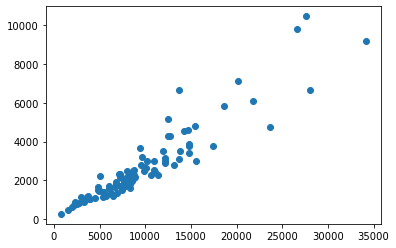

In [160]:
plt.scatter(name_stats.propotional_favorite_agg, name_stats.propotional_retweet_agg);

There is a strong positive relantionship between the aggretations of the favorite and of the retweet. "Zoey", "Earl", "Bo", "Sunny", "Gary", "Phil" and "Dexter" are the names who showed in the top 10 of both data.

### 1.C. Is there a relationship betweet these two data?

In [158]:
name_stats.sort_values(by='name_count', ascending=False).iloc[:10]

,position,name,name_count,favorite_agg,retweet_agg,propotional_favorite_agg,propotional_retweet_agg
0,0,Lucy,11,79357.0,25640.0,7214.272727,2330.909091
1,1,Charlie,11,96827.0,23007.0,8802.454545,2091.545455
2,2,Oliver,10,66962.0,16432.0,6696.200000,1643.200000
3,3,Cooper,10,61311.0,15826.0,6131.100000,1582.600000
4,4,Penny,9,91293.0,26890.0,10143.666667,2987.777778
5,5,Tucker,9,68825.0,16503.0,7647.222222,1833.666667
6,6,Sadie,8,42905.0,11075.0,5363.125000,1384.375000
7,7,Winston,8,70081.0,18163.0,8760.125000,2270.375000
8,8,Lola,8,54085.0,14696.0,6760.625000,1837.000000
9,9,Toby,7,52071.0,14844.0,7438.714286,2120.571429


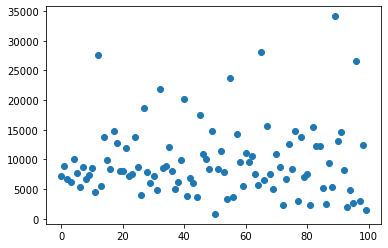

In [156]:
plt.scatter(name_stats.position, name_stats.propotional_favorite_agg);

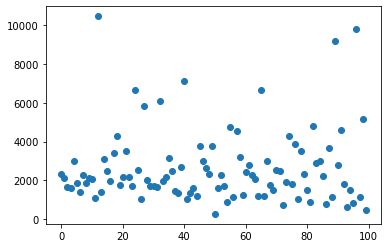

In [157]:
plt.scatter(name_stats.position, name_stats.propotional_retweet_agg);

There is a weak negative relationship between the most popular name and the names with more retweets and favorites. The name "Bo" is the best colocated in both data.

### 2. Is there a source that give higher ratings than others?
Frist let's calculate the rating for each record.

In [60]:
twitter_archive_master['rating'] = twitter_archive_master.rating_numerator / twitter_archive_master.rating_denominator

In [61]:
twitter_archive_master.rating.describe()

count    2116.000000
mean        1.163789
std         3.945273
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

In [62]:
twitter_archive_master.rating.value_counts()

1.200      493
1.000      430
1.100      424
1.300      297
0.900      154
0.800      101
0.700       53
1.400       41
0.600       33
0.500       32
0.300       19
0.400       16
0.200       10
0.100        5
0.000        2
42.000       1
1.127        1
1.350        1
0.975        1
177.600      1
1.126        1
Name: rating, dtype: int64

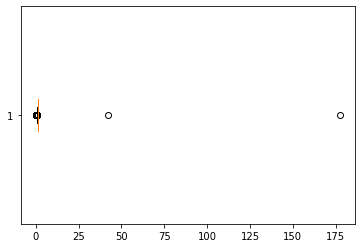

In [63]:
plt.boxplot(twitter_archive_master.rating, vert=False);

We can see that there are two visible outlines (ratings equals to 177.6 and equals to 42). Lets take a closer look in those records

In [64]:
twitter_archive_master.query('rating == 42 or rating == 177.6')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,rating
771,749981277374128128,NaN,NaN,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10.0,Atticus,NaN,NaN,NaN,NaN,2387.0,4955.0,177.6
1839,670842764863651840,NaN,NaN,2015-11-29 05:52:33+00:00,Twitter for iPhone,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420.0,10.0,NaN,NaN,NaN,NaN,NaN,7999.0,22996.0,42.0


Because it is not a parse issue, I decided to remove this records because they do not seem to be a typo error.

In [65]:
twitter_archive_master.drop(index=twitter_archive_master.query('rating == 42 or rating == 177.6').index, inplace=True)

In [66]:
twitter_archive_master.rating.describe()

count    2114.000000
mean        1.061011
std         0.218290
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max         1.400000
Name: rating, dtype: float64

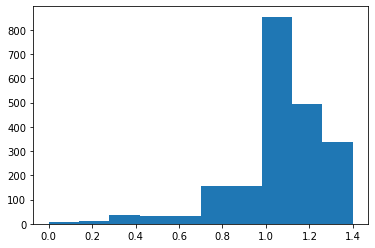

In [67]:
plt.hist(twitter_archive_master.rating);

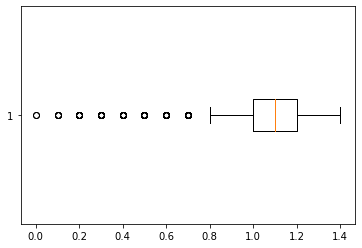

In [78]:
plt.boxplot(twitter_archive_master.rating, vert=False);

Removing the outlines had a huge impact in the standard deviation. When plotting the box plot again, we can see that value below 0.8 are considered as outliers. Let's take a closer look

In [79]:
twitter_archive_master.query('rating < 0.8')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,rating
186,848212111729840128,NaN,NaN,2017-04-01 16:35:01+00:00,Twitter for iPhone,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",https://twitter.com/dog_rates/status/848212111729840128/photo/1,6.0,10.0,Jerry,NaN,NaN,NaN,NaN,2859.0,15647.0,0.6
249,835152434251116546,NaN,NaN,2017-02-24 15:40:31+00:00,Twitter for iPhone,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0.0,10.0,NaN,NaN,NaN,NaN,NaN,2896.0,21791.0,0.0
560,781661882474196992,NaN,NaN,2016-09-30 01:08:10+00:00,Twitter for iPhone,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,https://twitter.com/dog_rates/status/781661882474196992/photo/1,5.0,10.0,NaN,NaN,NaN,NaN,NaN,2667.0,10288.0,0.5
588,777885040357281792,NaN,NaN,2016-09-19 15:00:20+00:00,Twitter for iPhone,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,"https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/status/777885040357281792/photo/1",3.0,10.0,Wesley,NaN,NaN,NaN,NaN,1592.0,6245.0,0.3
629,771014301343748096,NaN,NaN,2016-08-31 15:58:28+00:00,Twitter for iPhone,Another pic without a dog in it? What am I supposed to do? Rate the carpet? Fine I will. 7/10 looks adequately comfy https://t.co/OJZQ6I4gGd,https://twitter.com/dog_rates/status/771014301343748096/photo/1,7.0,10.0,NaN,NaN,NaN,NaN,NaN,1612.0,6738.0,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,666082916733198337,NaN,NaN,2015-11-16 02:38:37+00:00,Twitter for iPhone,Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,https://twitter.com/dog_rates/status/666082916733198337/photo/1,6.0,10.0,NaN,NaN,NaN,NaN,NaN,41.0,101.0,0.6
2109,666051853826850816,NaN,NaN,2015-11-16 00:35:11+00:00,Twitter for iPhone,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2.0,10.0,NaN,NaN,NaN,NaN,NaN,744.0,1088.0,0.2
2111,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,NaN,NaN,NaN,NaN,NaN,38.0,94.0,0.5
2112,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,NaN,NaN,NaN,NaN,NaN,122.0,261.0,0.6


The values below 0.8 are not a parser problem and they seems to be legit. So I will stay with this data.

Let's take a look in the distribution of the source

In [161]:
twitter_archive_master.source.value_counts()

Twitter for iPhone     1983
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                10
Name: source, dtype: int64

The major part of the tweets was made using a mobile device. Let's see if there a relationship between the source and the rating

In [170]:
twitter_archive_master.groupby('source').rating.mean()

source
TweetDeck              1.110000
Twitter Web Client     1.000000
Twitter for iPhone     1.058083
Vine - Make a Scene    1.139560
Name: rating, dtype: float64

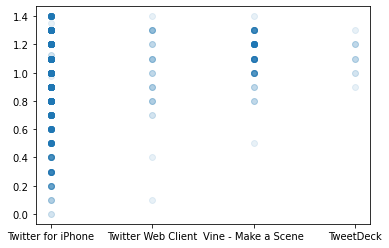

In [184]:
# The darker dots are more frequent
plt.scatter(twitter_archive_master.source, twitter_archive_master.rating, alpha=0.1);

The "TweetDeck" and "Vine" are the source that have a rating greather that the mean of the database. We can see that tweets sent by the "TweetDeck" are way less frequent that sent by "Vine".

### 3. Does a higher rating tend to have more like and retweets?

In [176]:
twitter_archive_master.groupby('rating')[['retweet_count', 'favorite_count']].mean()

,retweet_count,favorite_count
rating,,
0.000,1590.000000,12302.000000
0.100,2128.000000,5081.400000
0.200,1051.300000,1953.200000
0.300,798.210526,2091.684211
0.400,869.187500,2247.125000
0.500,896.187500,2331.187500
0.600,862.909091,2368.121212
0.700,892.641509,2640.528302
0.800,729.029703,2075.772277


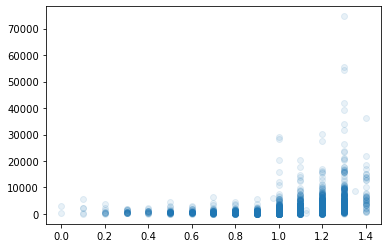

In [185]:
# The darkers dots are more frequent
plt.scatter(twitter_archive_master.rating, twitter_archive_master.retweet_count, alpha=0.1);

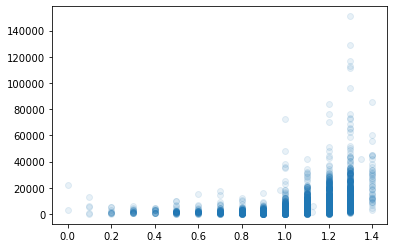

In [186]:
# The darkers dots are more frequent
plt.scatter(twitter_archive_master.rating, twitter_archive_master.favorite_count, alpha=0.1);

Based on the distribution, there is a moderated positive relationship between the rating and the favorite and retweet count.